# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
Successfully complete all these objectives to earn full credit. 

**Successful completion is defined as passing all the unit tests in each objective.**  

Each unit test that you pass is 1 point. 

There are 5 total possible points in this sprint challenge. 


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section). 
____



### Import Data

In [2]:
""" Import Statements """
# From 412 Vect Reps Lecture
# Classics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])

In [3]:
#1. Basic imports to load data
import json
import pandas as pd

#2. Load reviews from URL (downloaded)
# data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'
data = './data/review_sample.json'

#3. Import data into a DataFrame named df
with open(data) as f:
  df = pd.DataFrame([json.loads(line) for line in f.readlines()])

#3b. ALTERNATIVE
# df = pd.read_json(
#     data_url,
#     lines=True
#     )

#4. print head
df.head()  # Shows data frame as expected

business_id  cool           date  funny               review_id  \
0  nDuEqIyRc8YKS1q1fX0CZg     1  1427820630000      0  eZs2tpEJtXPwawvHnHZIgQ   
1  eMYeEapscbKNqUDCx705hg     0  1450243863000      0  DoQDWJsNbU0KL1O29l_Xug   
2  6Q7-wkCPc1KF75jZLOTcMw     1  1277061288000      1  DDOdGU7zh56yQHmUnL1idQ   
3  k3zrItO4l9hwfLRwHBDc9w     3  1278981225000      4  LfTMUWnfGFMOfOIyJcwLVA   
4  6hpfRwGlOzbNv7k5eP9rsQ     1  1530325801000      0  zJSUdI7bJ8PNJAg4lnl_Gg   

   stars                                               text  useful  \
0      1  BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...      10   
1      4  Came here for lunch Togo. Service was quick. S...       0   
2      3  I've been to Vegas dozens of times and had nev...       2   
3      1  We went here on a night where they closed off ...       5   
4      4  3.5 to 4 stars\n\nNot bad for the price, $12.9...       5   

                  user_id  
0  n1LM36qNg4rqGXIcvVXv8w  
1  5CgjjDAic2-FAvCtiHpytA  
2  BdV-cf3LScmb8kZ7iiBcMA  
3  cZZnBqh4gAEy4CdNvJailQ  
4  n9QO4ClYAS7h9fpQwa5bhA

In [4]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [5]:
#1. Import re to clean text.
import re

#2. Create 'cleanup' function with re to accept only alpha chars, eliminate spaces, make all lowercase.
def cleanup(text):
    return re.sub('[^a-zA-Z ]', '', text).lower()

#3. Apply cleanup function to all in df 'text' column.
df['clean_text'] = df['text'].apply(cleanup)

#4. Print newly created column.
df['clean_text'].head()

0    beware fake fake fakewe also own a small busin...
1    came here for lunch togo service was quick sta...
2    ive been to vegas dozens of times and had neve...
3    we went here on a night where they closed off ...
4     to  starsnot bad for the price  for lunch sen...
Name: clean_text, dtype: object

In [6]:
#5. Doing frequency count to do it.
corpus = df['clean_text']

#6. Import the feature_extraction module and vectorizer
from sklearn.feature_extraction.text import CountVectorizer

#7. Instantiate the object and count the words
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)

#8. Convert to dense vectors (leave out the zeroes)
print(vectors.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.
#import spacy
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger', 'ner'])

In [8]:
def tokenizer(text):
# text = whatever is passed in or applied so doc is spacy (nlp) sorted text.
    doc = nlp(text)

    # Create a list of tokens using nlp and the sample string "text"
    tokens = []

    # iterate through the tokens in the doc
    for token in doc:

        # create a couple of filters for low quality tokens 
        if (token.is_stop != True) and (token.is_punct != True) and (token.pos_ != 'PRON'):
            keyword = token.lemma_.strip()
            # to exclude blanks
            if len(keyword) > 2: 
            # save case normalized lemmas to token list 
                tokens.append(token.lemma_.lower())
            
    return tokens

In [9]:
#9. View 1st entry.
df['clean_text'][1]

'came here for lunch togo service was quick staff was friendly no complaints here sweet tea is good parking can be a pain sometimes'

In [10]:
#10. Test the 1st entry.
tokenizer(df['clean_text'][1])

['come',
 'lunch',
 'togo',
 'service',
 'quick',
 'staff',
 'friendly',
 'complaint',
 'sweet',
 'tea',
 'good',
 'park',
 'pain']

In [ ]:
%%time
#004  Create 'clean tokens' from 'clean text'
# Apply to all entries in column.
df['clean_tokens'] = df['clean_text'].apply(tokenize)
df['clean_tokens'].head()

0    [beware, fake, fake, fakewe, small, business, ...
1    [come, lunch, togo, service, quick, staff, fri...
2    [have, vegas, dozen, time, step, foot, circus,...
3    [night, close, street, party, good, actually, ...
4    [starsnot, bad, price, lunch, senior, pay, eat...
Name: clean_tokens, dtype: object

In [11]:
#11. Apply to all entries in column.
df['clean_tokens'] = df['clean_text'].apply(tokenizer)
df['clean_tokens'].head()

0    [beware, fake, fake, fakewe, small, business, ...
1    [come, lunch, togo, service, quick, staff, fri...
2    [have, vega, dozen, time, step, foot, circus, ...
3    [night, close, street, party, well, actually, ...
4    [starsnot, bad, price, lunch, senior, pay, eat...
Name: clean_tokens, dtype: object

In [12]:
'''Testing'''
assert isinstance(tokenizer(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
2. Write a fake review and query for the 10 most similar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, use `NearestNeighbors` model for this. 

## TfidfVectorizer
### Term Frequency - Inverse Document Frequency (TF-IDF)

![](https://miro.medium.com/max/1404/1*mu6G-cBmWlENS4pWHEnGcg@2x.jpeg)

**Term Frequency:** The count of token i in document j 

**Document Frequency:** A penalty for the token existing in a high number of documents.

The purpose of TF-IDF is to find what is **unique** to each document. Because of this we will penalize the term frequencies of words that are common across all documents which will allow for each document's most different topics to rise to the top.

In [13]:
%%time
#1. Create a vector representation of the reviews 
# Name that doc-term matrix "dtm"# Create a vocabulary and get word counts per document?
## Create bag of words and returns a meaure of count for each review based on its uniqueness
# Declare data for simplicity.
data = df['clean_text']
# Instantiate vectorizer object
vect = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,3),  # looking for words occuring together i think
                       min_df=3,           # statistical trimming - ignore words that happen < 2 
                       max_df=0.5,         # Im not sure about this?? <:o {max_df=.8,}
                       max_features=100,   # ...or this?
                       tokenizer=tokenizer)         # or you can use 0.3 (30%) to get rid of common words like Amazon (usually 25-70%)
                                           # changing these makes huge differences. I must play with.
# Create a vocabulary and get word counts per document
# Learn our Vocab
vect.fit(data)
# Get sparse dtm (i.e. transform the data)
dtm = vect.transform(data)
# dtm = vect.fit_transform(data)
# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(data=dtm.toarray(), columns= vect.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

C:\Users\somer\miniconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(10000, 100)
Wall time: 19.8 s


amaze      area  ask       bad       bar  big      bite  bring     check  \
0    0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000    0.0  0.000000   
1    0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000    0.0  0.000000   
2    0.0  0.137834  0.0  0.000000  0.136553  0.0  0.000000    0.0  0.136083   
3    0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000    0.0  0.000000   
4    0.0  0.000000  0.0  0.232963  0.460319  0.0  0.217747    0.0  0.000000   

   cheese  ...      try      vega  visit      wait  walk  want  way  work  \
0     0.0  ...  0.24356  0.000000    0.0  0.282161   0.0   0.0  0.0   0.0   
1     0.0  ...  0.00000  0.000000    0.0  0.000000   0.0   0.0  0.0   0.0   
2     0.0  ...  0.00000  0.276105    0.0  0.000000   0.0   0.0  0.0   0.0   
3     0.0  ...  0.00000  0.000000    0.0  0.000000   0.0   0.0  0.0   0.0   
4     0.0  ...  0.00000  0.000000    0.0  0.000000   0.0   0.0  0.0   0.0   

   wrong      year  
0    0.0  0.000000  
1    0.0  0.000000  
2    0.0  0.131273  
3    0.0  0.000000  
4    0.0  0.000000  

[5 rows x 100 columns]

In [14]:
#2. Create and fit a NearestNeighbors model named "nn"
nn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [15]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [16]:
print(len(dtm.iloc[0]))   # tfidf vector of all articles with respect to the first article

print(type(dtm.iloc[92].values))
# returns a list of five nearest neighbors distance, and another list of those neighbors' row number
nn.kneighbors([dtm.iloc[0].values])

100
<class 'numpy.ndarray'>


(array([[0.        , 0.83820993, 0.8583763 , 0.8583763 , 0.87834979,
         0.87985561, 0.8956935 , 0.90144971, 0.90245728, 0.90683733]]),
 array([[   0, 4486,  262, 3412, 1861, 3133, 3732, 8437,  797, 8575]],
       dtype=int64))

In [17]:
# Create a fake review and find the 10 most similar reviews
fake_review = [ "The Management of this particular resturant is the worst I've ever encountered. Felicia and AJ have said repeatedly that they can run the place by themselves. All they've managed to do was run it into failure. They harass the employees relentlessly. Look at the recent turn over rate. There's even rumors of sexual harassment. The Management harassing a member to move in with them and Felicia stating  I'll get petty if I have to as long as I get my way  I think corporate needs to do an investigation before a law suit is filed." ]

new_dtm = vect.transform(fake_review)
print(new_dtm.shape)

(1, 100)


In [18]:
nn.kneighbors(new_dtm.todense())

(array([[0.84141583, 0.88609765, 0.93669847, 0.93752312, 0.95799971,
         0.95905959, 0.96884399, 0.97431082, 0.99053336, 0.99435497]]),
 array([[5599, 7945, 1374, 8991, 7087, 4279, 1924, 8594, 4163, 4782]],
       dtype=int64))

In [19]:
df["text"][5599],"",df["text"][7945],"",df["text"][1374],"",df["text"][8991]

('CAUTION!!! I HAD TO HAVE SURGERY TO REMOVE PART OF MY TOENAIL!!! I had a pedicure there a few weeks ago and the lady cut my nails way to short, once they stated growing back 5 of them became ingrown... My big toe got infected and I went to the doctor. She said "wow they butchered you, really cut the shit out of your toenails" She then proceeded to numb my toe and remove about half the nail, it was disgusting. I now have 8-10 months of deformity to look forward to. Thanks for the worst pedicure of my life.',
 '',
 'Think again people they are misleading and liars within the company. They are dishonest and change their minds or forget what they said. I find the to be shady and think we all need to look somewhere else for the mortgage needs. Maybe than they will see they have problems within the company and try to fix them.',
 '',
 'I called for delivery, it took two hours for it to get to me, which was across the street at the hospital. The food was cold, and it had an odd smell as if 

In [20]:
df["text"][5599]

'CAUTION!!! I HAD TO HAVE SURGERY TO REMOVE PART OF MY TOENAIL!!! I had a pedicure there a few weeks ago and the lady cut my nails way to short, once they stated growing back 5 of them became ingrown... My big toe got infected and I went to the doctor. She said "wow they butchered you, really cut the shit out of your toenails" She then proceeded to numb my toe and remove about half the nail, it was disgusting. I now have 8-10 months of deformity to look forward to. Thanks for the worst pedicure of my life.'

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels). 
    - Use that Pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 possible values for each parameter
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [21]:
#1. Some Imports
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Name the gridsearch instance "gs"

# YOUR CODE HERE
# raise NotImplementedError()

In [22]:
#2. Using RFC again
rfc = RandomForestClassifier()

pipe = Pipeline([
        ('vect', vect), 
        ('clf', rfc)
        ])

In [23]:
#3. Set parameters
parameters = {
    'vect__max_df': (0.75, 0.85),
    'clf__max_depth':(5,10)
}

gs = GridSearchCV(pipe,parameters, cv=2, n_jobs=-1, verbose=1)
gs.fit(df['clean_text'], df['stars'])

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   39.5s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.5,
                                                        max_features=100,
                                                        min_df=3,
                                                        ngram_range=(1, 3),
                                                        nor

In [24]:
gs.best_params_

{'clf__max_depth': 10, 'vect__max_df': 0.85}

In [25]:
#4. Predictions on test sample
pred = gs.predict(fake_review)
pred

array([1], dtype=int64)

Gives 1 star rating which is accurate!  Great success! ![](https://emojis.slackmojis.com/emojis/images/1510742343/3197/borat.gif?1510742343)

In [26]:
# Visible Testing
prediction = gs.predict(["I wish dogs knew how to speak English."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.** 

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz). 

In [27]:
from gensim import corpora
# Due to limited computationalresources on CodeGrader, use the non-multicore version of LDA 
from gensim.models.ldamodel import LdaModel
from gensim.models import LdaMulticore
import gensim
import re

### 1. Estimate a LDA topic model of the review tex

In [28]:
# Remember to read the LDA docs for more information on the various class attirbutes and methods available to you
# in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

# don't change this value 
num_topics = 5

# use tokenize function you created earlier to create tokens 


In [29]:
# create a id2word object (hint: use corpora.Dictionary)
id2word = corpora.Dictionary(df['clean_tokens'])
print(len(id2word),len(df))


29908 10000


In [30]:
id2word.filter_extremes(no_below=15, no_above=0.85)
len(id2word.keys())

2837

In [31]:

# create a corpus object (hint: id2word.doc2bow)
corpus = [id2word.doc2bow(text) for text in df['clean_tokens']]
len(corpus)


10000

In [59]:
# instantiate an lda model
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=2,
                   workers=4,
                   num_topics = 5 # You can change this parameter
                  )
# YOUR CODE HERE
#raise NotImplementedError()

In [60]:
lda.print_topics()

[(0,
  '0.020*"not" + 0.015*"place" + 0.013*"food" + 0.010*"great" + 0.009*"come" + 0.009*"service" + 0.009*"like" + 0.009*"good" + 0.008*"time" + 0.008*"get"'),
 (1,
  '0.017*"not" + 0.013*"place" + 0.013*"time" + 0.012*"great" + 0.012*"good" + 0.011*"food" + 0.011*"service" + 0.011*"order" + 0.010*"like" + 0.009*"come"'),
 (2,
  '0.021*"not" + 0.015*"great" + 0.012*"good" + 0.012*"food" + 0.011*"time" + 0.010*"place" + 0.009*"come" + 0.009*"get" + 0.009*"service" + 0.008*"order"'),
 (3,
  '0.015*"not" + 0.012*"time" + 0.012*"good" + 0.011*"food" + 0.011*"place" + 0.010*"come" + 0.009*"like" + 0.008*"service" + 0.007*"well" + 0.007*"great"'),
 (4,
  '0.017*"not" + 0.014*"place" + 0.012*"food" + 0.012*"like" + 0.011*"good" + 0.010*"come" + 0.009*"order" + 0.008*"service" + 0.008*"great" + 0.007*"time"')]

#### Testing

In [61]:
# Visible Testing
assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 1-2 visualizations of the results

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use pyLDAvis (or a ploting tool of your choice) to visualize your results 

# YOUR CODE HERE
# raise NotImplementedError()

In [63]:
words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(10)]

In [64]:
print(len(words))
words[0]

5


['"not"',
 '"place"',
 '"food"',
 '"great"',
 '"come"',
 '"service"',
 '"like"',
 '"good"',
 '"time"',
 '"get"']

In [65]:
topic_labels = [', '.join(t[:]) for t in words]

In [66]:
for id, t in enumerate(topic_labels): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"not", "place", "food", "great", "come", "service", "like", "good", "time", "get"

------ Topic 1 ------
"not", "place", "time", "great", "good", "food", "service", "order", "like", "come"

------ Topic 2 ------
"not", "great", "good", "food", "time", "place", "come", "get", "service", "order"

------ Topic 3 ------
"not", "time", "good", "food", "place", "come", "like", "service", "well", "great"

------ Topic 4 ------
"not", "place", "food", "like", "good", "come", "order", "service", "great", "time"



In [67]:
# estimated percentage of topics that exist in each document
distro = [lda[doc] for doc in corpus]
distro[0]

[(0, 0.22162448),
 (1, 0.17480293),
 (2, 0.14165205),
 (3, 0.21582267),
 (4, 0.24609794)]

In [68]:
def update(doc):
    """fills all the irrelevant topic keys for document doc with 0 distribution probability"""
    d_dist = {k:0 for k in range(0,5)}
    for t in doc:
        #update topic # t[0] key with t[1] value
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

In [69]:
# .from_records Creates a DataFrame object from a structured ndarray, sequence of tuples or dicts, or DataFrame
topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels
print(topics.shape)
topics.head()

(10000, 5)


"not", "place", "food", "great", "come", "service", "like", "good", "time", "get"  \
0                                           0.221624                                   
1                                           0.247467                                   
2                                           0.182392                                   
3                                           0.274001                                   
4                                           0.260805                                   

   "not", "place", "time", "great", "good", "food", "service", "order", "like", "come"  \
0                                           0.174803                                     
1                                           0.242277                                     
2                                           0.204504                                     
3                                           0.200416                                     
4                                           0.160029                                     

   "not", "great", "good", "food", "time", "place", "come", "get", "service", "order"  \
0                                           0.141652                                    
1                                           0.152408                                    
2                                           0.200583                                    
3                                           0.207909                                    
4                                           0.193336                                    

   "not", "time", "good", "food", "place", "come", "like", "service", "well", "great"  \
0                                           0.215823                                    
1                                           0.172302                                    
2                                           0.213605                                    
3                                           0.131329                                    
4                                           0.195149                                    

   "not", "place", "food", "like", "good", "come", "order", "service", "great", "time"  
0                                           0.246098                                    
1                                           0.185545                                    
2                                           0.198916                                    
3                                           0.186345                                    
4                                           0.190682

In [70]:
# find the index on axis=1 where the value in the row is max
df['primary_topic'] = topics.idxmax(axis=1)

In [71]:
df['primary_topic'].value_counts()

"not", "place", "time", "great", "good", "food", "service", "order", "like", "come"    2083
"not", "place", "food", "great", "come", "service", "like", "good", "time", "get"      2012
"not", "place", "food", "like", "good", "come", "order", "service", "great", "time"    1986
"not", "great", "good", "food", "time", "place", "come", "get", "service", "order"     1960
"not", "time", "good", "food", "place", "come", "like", "service", "well", "great"     1959
Name: primary_topic, dtype: int64

In [72]:
# Count number of reviews for each primary_topic that have different star ratings
agg = pd.pivot_table(df, values=['text'], 
                     index=['primary_topic'], 
                     columns=['stars'], aggfunc='count')

In [73]:
agg

text                    
stars                                                 1    2    3    4    5
primary_topic                                                              
"not", "great", "good", "food", "time", "place"...  290  114  204  446  906
"not", "place", "food", "great", "come", "servi...  330  174  223  435  850
"not", "place", "food", "like", "good", "come",...  322  173  234  412  845
"not", "place", "time", "great", "good", "food"...  254  154  226  487  962
"not", "time", "good", "food", "place", "come",...  300  144  211  405  899

In [74]:
# Remov the nested columns
agg = agg.reset_index()
agg.columns = ['primary_topic', 'star1', 'star2', 'star3', 'star4', 'star5']
agg.head()

primary_topic  star1  star2  star3  \
0  "not", "great", "good", "food", "time", "place...    290    114    204   
1  "not", "place", "food", "great", "come", "serv...    330    174    223   
2  "not", "place", "food", "like", "good", "come"...    322    173    234   
3  "not", "place", "time", "great", "good", "food...    254    154    226   
4  "not", "time", "good", "food", "place", "come"...    300    144    211   

   star4  star5  
0    446    906  
1    435    850  
2    412    845  
3    487    962  
4    405    899

C:\Users\somer\miniconda3\envs\U4-S1-NLP\lib\site-packages\seaborn\categorical.py:339: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\somer\miniconda3\envs\U4-S1-NLP\lib\site-packages\seaborn\categorical.py:339: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\somer

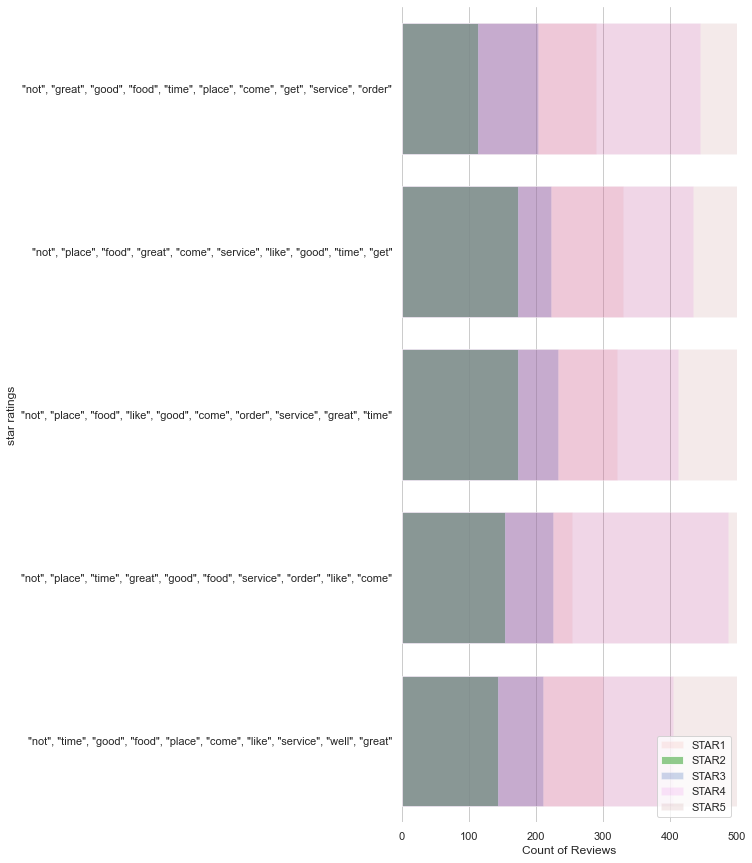

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes('pastel')
sns.barplot(x='star1', y='primary_topic', data=agg, label="STAR1", color="r", alpha=0.2) #, stacked=True)

sns.set_color_codes('muted')
sns.barplot(x='star2', y='primary_topic', data=agg, label="STAR2", color="g", alpha=0.8)

sns.set_color_codes('muted')
sns.barplot(x='star3', y='primary_topic', data=agg, label="STAR3", color="b", alpha=0.3)

sns.set_color_codes('pastel')
sns.barplot(x='star4', y='primary_topic', data=agg, label="STAR4", color="magenta", alpha=0.1)

sns.set_color_codes('pastel')
sns.barplot(x='star5', y='primary_topic', data=agg, label="STAR5", color="brown", alpha=0.1)

ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0,500), ylabel="star ratings", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)

In [76]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [77]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\somer\miniconda3\envs\U4-S1-NLP\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.003411 -0.002555       1        1  20.090462
0     -0.001473 -0.003323       2        1  20.041383
2     -0.004213  0.000290       3        1  19.981914
3     -0.000457  0.003206       4        1  19.955145
4      0.002731  0.002383       5        1  19.931097, topic_info=      Term         Freq        Total Category  logprob  loglift
164  great  4280.000000  4280.000000  Default  30.0000  30.0000
294  order  3389.000000  3389.000000  Default  29.0000  29.0000
26    time  4244.000000  4244.000000  Default  28.0000  28.0000
22     say  1552.000000  1552.000000  Default  27.0000  27.0000
10    like  3755.000000  3755.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
26    time   616.335766  4244.071984   Topic5  -4.9022  -0.3166
13    look   368.303000  1992.850066   Topic5  -5.4170  -0.0755
323    ask   317.362061  1516.836879   Topic5  -5.5659   0.0485
118    eat   313.919000  1550.307555   Topic5  -5.5768   0.0158
386   tell   304.247479  1528.300923   Topic5  -5.6081  -0.0012

[415 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1009      1  0.181254  able
1009      2  0.183737  able
1009      3  0.292987  able
1009      4  0.181254  able
1009      5  0.161391  able
...     ...       ...   ...
96        1  0.184611  wynn
96        2  0.290103  wynn
96        3  0.184611  wynn
96        4  0.131865  wynn
96        5  0.210984  wynn

[1325 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4, 5])

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from scipy.stats import randint

In [80]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, 
                               subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                               max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, 
                               init=None, random_state=None, max_features=None, verbose=0, 
                               max_leaf_nodes=None, warm_start=False, presort='deprecated', 
                               validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [82]:
pipe = Pipeline([
    ('vect', vect), 
    ('clf', gbc)
    ])

In [83]:
# Gradient Boost Classifier
gbc_par_names = ["max_features", "max_depth", "min_samples_split", "min_samples_leaf"]

max_features_gbc = np.arange(2,10,2)
max_depth_gbc = range(2,6,2)
min_samples_split_gbc = np.linspace(2, 40, 10, endpoint=True).astype(int)
min_samples_leaf_gbc = np.linspace(2, 40, 10, endpoint=True).astype(int)
criterion_gbc = ["gini", "entropy"]
gbc_param_ranges = [max_features_gbc, max_depth_gbc, min_samples_split_gbc, min_samples_leaf_gbc]

param_dist = {
    'clf__max_features': max_features_gbc, 
    'clf__max_depth': max_depth_gbc, 
#     'clf__min_samples_split': min_samples_split_gbc, 
#     'clf__min_samples_leaf': min_samples_leaf_gbc
    }

In [84]:
rscv = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=2, cv=2, verbose=1, n_jobs=-1)

In [86]:
rscv.fit(df['clean_text'], df['stars'])

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   25.9s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   32.6s finished
C:\Users\somer\miniconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\model_selection\_search.py:818: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\somer\miniconda3\envs\U4-S1-NLP\lib\site-packages\catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for ent

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('vect',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=0.5,
                                                              max_features=100,
                                                              min_df=3,
                                                         

In [87]:
# Predictions on test sample
pred = rscv.predict(fake_review)
pred

C:\Users\somer\miniconda3\envs\U4-S1-NLP\lib\site-packages\catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\somer\miniconda3\envs\U4-S1-NLP\lib\site-packages\catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


array([1], dtype=int64)

#### 3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

    Our objective in this Jupyter project is to import a dataset, analyze, tokenize, and apply Latent Dirichlet Allocation to uncover topics that the documents within belong.

    LDA sorts documents with similar topics by seeking word groups. This enables the us to map the probability distribution of potentially hidden topics. The method can be used in many business and investigative applications. 